OSCILADOR ARMÓNICO AMORTIGUADO FORZADO: Diagramas de Poincaré, dimensión fractal y distribución de tiempos

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scipy
from math import *
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import os

VALORES NUMÉRICOS DEL PROBLEMA

Condiciones iniciales

In [3]:
x_0 = 10 # Posición inicial
v_0 = 0 # Velocidad inicial

Parámetros del sistema

In [4]:
w_0 = 0.5 # Frecuencia natural x>0
W_0 = 8 # Frecuencia natural x<0
w = 1.5 # Frecuencia fuerza externa
f_0 = 0.25 # Amplitud de la fuerza por unidad de masa

Parámetro variable

In [5]:
damort = 0.0005 # paso en el amortiguamiento
amort =  np.array([i*damort for i in range(int(0/damort),int(0.125/damort)+1)]) # Constante de amortiguamiento
tcarac = 1/amort
#print(tcarac)

C:\Users\rodri\AppData\Local\Temp\ipykernel_13900\1514891954.py:3: RuntimeWarning: divide by zero encountered in divide
  tcarac = 1/amort


DEFINIMOS UNA FRECUENCIA NATURAL DEL OSCILADOR QUE DEPENDE DE LA POSICIÓN

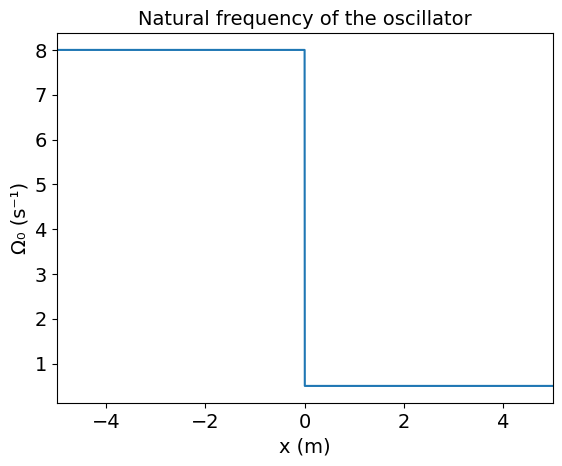

In [181]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
rep = np.linspace(-5,5,5000)
plt.plot(rep,W(rep)) # Representación gráfica de la frecuencia natural
plt.title('Natural frequency of the oscillator',fontsize = 14)
plt.xlabel('x (m)',fontsize = 14)
plt.ylabel('Ω₀ (s⁻¹)',fontsize = 14)
plt.xlim([min(rep),max(rep)])
#plt.savefig('Frecuencia natural.png')
plt.show()

POTENCIAL DEL OSCILADOR

In [182]:
def W2(x,W_0,w_0): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

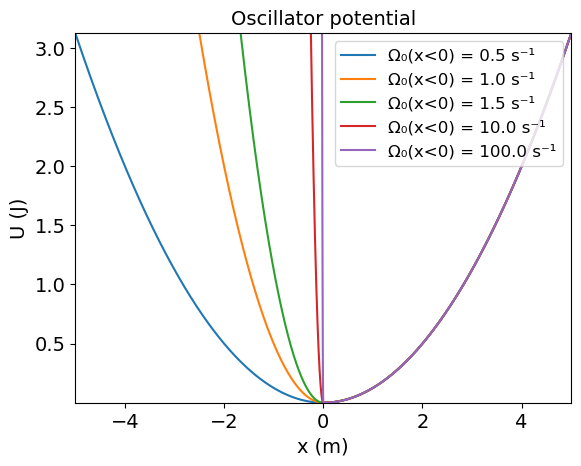

In [183]:
rep = np.linspace(-5,5,5000)
U = (1/2)*W2(rep,w_0,w_0)**2*rep**2
U2 = (1/2)*W2(rep,w_0+0.5,w_0)**2*rep**2
U3 = (1/2)*W2(rep,w_0+1,w_0)**2*rep**2
U4 = (1/2)*W2(rep,w_0+9.5,w_0)**2*rep**2
U5 = (1/2)*W2(rep,w_0+99.5,w_0)**2*rep**2

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.plot(rep,U,label = 'Ω₀(x<0) = '+str(format(w_0,'.1f'))+' s⁻¹')
plt.plot(rep,U2,label = 'Ω₀(x<0) = '+str(format(w_0+0.5,'.1f'))+' s⁻¹')
plt.plot(rep,U3,label = 'Ω₀(x<0) = '+str(format(w_0+1,'.1f'))+' s⁻¹')
plt.plot(rep,U4,label = 'Ω₀(x<0) = '+str(format(w_0+9.5,'.1f'))+' s⁻¹')
plt.plot(rep,U5,label = 'Ω₀(x<0) = '+str(format(w_0+99.5,'.1f'))+' s⁻¹')

plt.title('Oscillator potential',fontsize = 14)
plt.xlabel('x (m)',fontsize = 14)
plt.ylabel('U (J)',fontsize = 14)
plt.xlim([min(rep),max(rep)])
plt.ylim([min(U),(1/2)*W2(max(rep),w_0,w_0)**2*max(rep)**2])
plt.legend(loc = 'upper right',fontsize = 12)
#plt.savefig('Figura potencial del oscilador.png')
plt.show()

ECUACIÓN DIFERENCIAL

In [184]:
def EDO(t,y,amort): 
    x,v = y
    # return [v,-2*amort*v-W(x)**2*x+f_0*np.cos(w*t)] # Classical eqs.
    return [v-amort*x,-W(x)**2*x-amort*v+f_0*np.cos(w*t)] # Modified eqs.

In [185]:
def RK4(EDO, x0, y0, xf, h, amort):

    # EDO: Array de ecuaciones diferenciales de primer orden
    # x0: valor inicial de la variable independiente
    # y0: valor de la variable dependiente evaluada en x = x0 (condición inicial si x=0)
    # xf: valor final de la variable independiente
    # h: tamaño del paso

    n = int((xf-x0)/h)+1 # Calculamos el número de puntos
    m = 2
    
    x = np.empty(n) # Creamos arrays donde almacenar la solución
    y = np.empty([n,m])
    k1,k2,k3,k4= np.empty(m),np.empty(m),np.empty(m),np.empty(m)

    x[0] = x0 # Aplicamos las condiciones iniciales
    for j in range(m):
        y[0,j] = y0[j]
    
    for i in range(n-1): # Implementamos el método RK4
        x[i] = x0+i*h
        for j in range(m):
            k1[j] = h*EDO(x[i],y[i,:],amort)[j]
        for j in range(m):
            k2[j] = h*EDO(x[i]+0.5*h,y[i]+0.5*k1,amort)[j]
        for j in range(m):
            k3[j] = h*EDO(x[i]+0.5*h,y[i]+0.5*k2,amort)[j]
        for j in range(m):
            k4[j] = h*EDO(x[i]+h,y[i]+k3,amort)[j]
        for j in range(m):
            y[i+1,j] = y[i,j]+(1/6)*(k1[j]+2*k2[j]+2*k3[j]+k4[j]);

    x[n-1] = xf
            
    return x,y

CÁLCULO DEL MOVIMIENTO DEL SISTEMA

Medida del tiempo

In [186]:
dt = 0.01 # Paso de tiempo
tf = []
t = []
t0 = 0
for i in range(np.size(amort)):
    tf.append(5/amort[i]+5000)  # Tiempo de medida (se asume que t0 = 0)
    if tf[i] == inf:
        tf[i] = 1000
    t.append(np.linspace(t0,tf[i],int(tf[i]/dt)+1)) # Vector de instantes de tiempo

C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\898664249.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  tf.append(5/amort[i]+5000)  # Tiempo de medida (se asume que t0 = 0)


Integración de la EDO

In [187]:
def time_intervals(x,t):
    v = x.copy()
    bin = v[1:(t.size-1)]
    bin[[v[i]*v[i-1]>0 for i in range(1,t.size-1)]] = 0
    bin[bin<0] = -1
    bin[bin>0] = 1
    v[v.size-1] = -1

    tindpos = np.where(v > 0)[0]
    tindneg = np.where(v < 0)[0]

    if np.size(tindpos) > np.size(tindneg):
        tindpos = np.delete(tindpos,int(np.size(tindpos))-1)
    if np.size(tindpos) < np.size(tindneg):
        tindneg = np.delete(tindneg,int(np.size(tindneg))-1)

    return (tindneg-tindpos)[1:(len(tindneg-tindpos)-1)]*dt

In [188]:
pos = []
vel = []
xp = []
vp = []
tdist = []

T = 2*np.pi/w # Periodo fuerza externa

for i in tqdm(range(np.size(amort))):

    sol = scipy.integrate.solve_ivp(EDO, [0,tf[i]], [x_0,v_0], method = 'Radau',t_eval = t[i],args = [amort[i]])
    x,v = sol.y
    pos.append(x)
    vel.append(v)
    
    Np = int(tf[i]/T) # Número de puntos del diagrama de Poincaré
    ind = np.array([np.searchsorted(t[i],T*(j+1)) for j in range(Np-1)]) # Calculamos los índices del diagrama de Poincaré
    
    xp.append(x[ind]) # Asignamos índices encontrados en tiempos con posiciones y velocidades (/max(x[ind]))
    vp.append(v[ind])

    tdist.append(time_intervals(x,t[i])) # Calculamos los intervalos de tiempo entre choques

100%|██████████| 251/251 [1:54:45<00:00, 27.43s/it]  


CÁLCULO DEL EXPONENTE DE LYAPUNOV

In [189]:
def Lyapunov_exponent(EDO,t,tf,amort,eps,x_0,v_0):

    N = int((tf-t0)/dt)+1
    
    z = np.zeros([N,2])
    zp = np.zeros([N,2])
    d = np.zeros(N)
    loglist = np.zeros(N)

    z[0] = [x_0,v_0]
    zp[0] = [x_0+eps/np.sqrt(2),v_0+eps/np.sqrt(2)]
    d[0] = eps
   
    sol = scipy.integrate.solve_ivp(EDO, [0,tf], z[0], method = 'Radau',t_eval = t,args = [amort])
    pos,vel = sol.y
    solL = scipy.integrate.solve_ivp(EDO, [0,tf], zp[0], method = 'Radau',t_eval = t,args = [amort])
    posL,velL = solL.y
    
    for i in range(1,N):
        z[i] = [pos[i],vel[i]]
        zp[i] = [posL[i],velL[i]]
        d[i] = np.linalg.norm((z[i]-zp[i]))
        loglist[i] = np.log(d[i]/eps)
    
    lyap = np.mean((loglist/t)[-int(N/5):])
    com = scipy.signal.find_peaks(pos)[0][-100:]-scipy.signal.find_peaks(posL)[0][-100:]
    
    if amort != 0:
        if lyap > 0:
            '''
            if abs(np.mean(com)) < 0.1:
                lyap = -lyap
            else:
            '''
            for i in range(1,N):
                d[i] = np.linalg.norm((z[i]-zp[i-round(T/dt)]))
                loglist[i] = np.log(d[i]/eps)
            lyap = np.mean((loglist/t)[-int(N/5):])
            
        if lyap > 0:
            for i in range(1,N):
                d[i] = np.linalg.norm((z[i]-zp[i-2*round(T/dt)]))
                loglist[i] = np.log(d[i]/eps)
            lyap = np.mean((loglist/t)[-int(N/5):])

        if lyap > 0:
            for i in range(1,N):
                d[i] = np.linalg.norm((z[i]-zp[i-3*round(T/dt)]))
                loglist[i] = np.log(d[i]/eps)
            lyap = np.mean((loglist/t)[-int(N/5):])

        if lyap > 0:
            for i in range(1,N):
                d[i] = np.linalg.norm((z[i]-zp[i-4*round(T/dt)]))
                loglist[i] = np.log(d[i]/eps)
            lyap = np.mean((loglist/t)[-int(N/5):])

        if lyap > 0:
            for i in range(1,N):
                d[i] = np.linalg.norm((z[i]-zp[i-5*round(T/dt)]))
                loglist[i] = np.log(d[i]/eps)
            lyap = np.mean((loglist/t)[-int(N/5):])

        if lyap > 0:
            for i in range(1,N):
                d[i] = np.linalg.norm((z[i]-zp[i-6*round(T/dt)]))
                loglist[i] = np.log(d[i]/eps)
            lyap = np.mean((loglist/t)[-int(N/5):])
    
    return [lyap,np.std((loglist/t)[-int(N/5):])]

In [190]:
lyap = np.zeros(np.size(amort))
disp = np.zeros(np.size(amort))

tfL = []
tL = []
for i in range(np.size(amort)):
    tfL.append(5/amort[i]+1000)  # Tiempo de medida (se asume que t0 = 0)
    if tfL[i] == inf:
        tfL[i] = 1000
    tL.append(np.linspace(t0,tfL[i],int(tfL[i]/dt)+1)) # Vector de instantes de tiempo

eps = 1e-2

for i in tqdm(range(np.size(amort))):
    lyap[i],disp[i] = Lyapunov_exponent(EDO,tL[i],tfL[i],amort[i],eps,x_0,v_0)

C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\1659750837.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  tfL.append(5/amort[i]+1000)  # Tiempo de medida (se asume que t0 = 0)
  0%|          | 0/251 [00:00<?, ?it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\2101392017.py:25: RuntimeWarning: invalid value encountered in divide
  lyap = np.mean((loglist/t)[-int(N/5):])
C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\2101392017.py:70: RuntimeWarning: invalid value encountered in divide
  return [lyap,np.std((loglist/t)[-int(N/5):])]
  0%|          | 1/251 [00:09<38:48,  9.31s/it]C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\2101392017.py:38: RuntimeWarning: invalid value encountered in divide
  lyap = np.mean((loglist/t)[-int(N/5):])
C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\2101392017.py:44: RuntimeWarning: invalid value encountered in divide
  lyap = np.mean((loglist/t)[-int(N/5):])
C:\Users\rodri\AppData\Local\Temp\ipykernel_49088\2101392017

DISTRIBUCIÓN DE INTERVALOS DE TIEMPO

In [191]:
num_bin = 8000
tdist_hist = np.zeros([amort.size,num_bin])
num = 230

for i in range(amort.size):
    tdist_hist[i,:] = np.histogram(tdist[i][-num:], bins = num_bin, range = [0,8], density = True)[0]

CÁLCULO DE LA DIMENSIÓN FRACTAL

In [193]:
def FractalDimension(xp,vp,w): # Función que calcula la dimensión fractal de una imagen

    if w == 0:
        return nan,nan
    
    newpath = r'.\df' 
    if not os.path.exists(newpath):
        os.makedirs(newpath)

    fig = plt.figure()
    plt.plot(xp[-num:],vp[-num:],'.',color='red',markersize='1')
    plt.axis('off')
    plt.xlim([-0.25,0.75])
    plt.ylim([-0.75,0.75])
    plt.savefig('.\df/Poincaré g = '+str(format(w,'.5f'))+'.png', transparent=True)
    plt.close(fig)
    image = plt.imread('.\df/Poincaré g = '+str(format(w,'.5f'))+'.png')[:,:,3]
    
    Lx = image.shape[0]
    Ly = image.shape[1]
    pixels=[]
    Ns=[]
    E = np.logspace(0, 2, num = 100, endpoint=False, base=2)
    #E = [0.01,0.1,0.5,1,2,4,8,16,32]

    for i in range(Lx):
        for j in range(Ly):
            if image[i,j] > 0:
                pixels.append((i,j))

    pixels=np.array(pixels)
    
    for eps in E:
        Box, ejes = np.histogramdd(pixels, bins=(np.arange(0,Lx,eps),np.arange(0,Ly,eps)))
        Ns.append(np.sum(Box>0))
    fig2 = plt.figure()
    plt.plot(np.log(E),np.log(Ns),'.')
    plt.close(fig2)
    sol = np.polyfit(np.log(E),np.log(Ns),1,full=True)
    dF = -sol[0][0]
    r = sol[1]
    
    if r > 0.2:
        return nan,nan
    else:
        return dF,r

In [194]:
df = np.zeros(np.size(amort))
res = np.zeros(np.size(amort))

for i in tqdm(range(np.size(amort))):
    df[i],res[i] = FractalDimension(xp[i],vp[i],amort[i])

100%|██████████| 251/251 [07:18<00:00,  1.75s/it]


GUARDAMOS DATOS

In [199]:
newpath = r'.\xp' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = r'.\vp' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

newpath = r'.\tdist' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [202]:
for i in range(amort.size):
    np.savetxt(r'.\xp/xp amort = '+str(format(amort[i],'.5f'))+'.txt',xp[i])
    np.savetxt(r'.\vp/vp amort = '+str(format(amort[i],'.5f'))+'.txt',vp[i])
    np.savetxt(r'.\tdist/tdist amort = '+str(format(amort[i],'.5f'))+'.txt',tdist_hist[i])

In [203]:
fracdim = np.column_stack([df,res,amort])
np.savetxt('dimensión_fractal.txt',fracdim)

In [204]:
explyap = np.column_stack([lyap,disp,amort])
np.savetxt('explyap.txt',explyap)

CARGAMOS DATOS

In [6]:
a = open('dimensión_fractal.txt','r')

fracdim = a.readlines()
df = np.zeros(amort.size)
res = np.zeros(amort.size)

for i in range(amort.size):
    fracdim[i] = fracdim[i].split()
    df[i] = fracdim[i][0]
    res[i] = fracdim[i][1]

a.close()

In [7]:
xp = []
vp = []

for i in range(amort.size):
    b = open(r'.\xp/xp amort = '+str(format(amort[i],'.5f'))+'.txt','r')
    c = open(r'.\vp/vp amort = '+str(format(amort[i],'.5f'))+'.txt','r')
    XP = b.readlines()
    VP = c.readlines()
    for j in range(len(XP)):
        XP[j] = float((XP[j].split())[0])
        VP[j] = float((VP[j].split())[0])
    xp.append(XP)
    vp.append(VP)

b.close()
c.close()

In [8]:
num_bin = 8000
tdist_hist = np.zeros([amort.size,num_bin])

for i in range(amort.size):
    d = open(r'.\tdist/tdist amort = '+str(format(amort[i],'.5f'))+'.txt','r')
    tdist_hist[i:] = d.readlines()

d.close()

In [9]:
e = open('explyap.txt','r')

explyap = e.readlines()
lyap = np.zeros(amort.size)
disp = np.zeros(amort.size)

for i in range(amort.size):
    explyap[i] = explyap[i].split()
    lyap[i] = explyap[i][0]
    disp[i] = explyap[i][1]

e.close()

REPRESENTACIÓN GRÁFICA

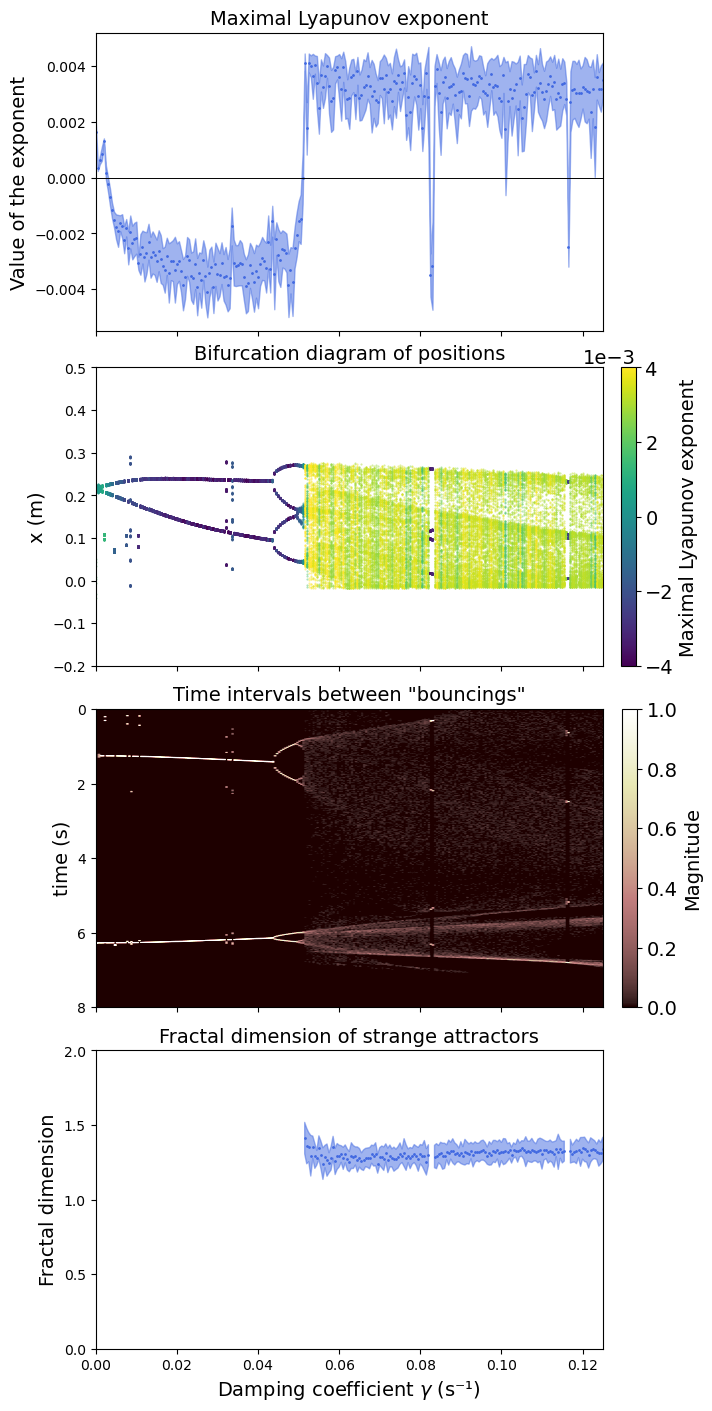

In [10]:
fig1,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(7, 14), sharex = True, constrained_layout=True)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

ax1.fill_between(amort,lyap-disp,lyap+disp,alpha = 0.5,color ='royalblue')
ax1.plot(amort,lyap,'.', markersize = '2', color = 'royalblue')
ax1.plot(amort,[0]*amort.size,color = 'black',linewidth = '.7')
ax1.set_ylabel('Value of the exponent',fontsize = 14)
ax1.set_title('Maximal Lyapunov exponent',fontsize = 14)
ax1.set_xlim(min(amort),max(amort))

num = 200
norm = colors.Normalize(vmin=-0.004, vmax=0.004)
f2rgb = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('viridis'))

for i in range(amort.size):
    ax2.plot(amort[i]*np.ones(num),np.array(xp[i],dtype=object)[-num:],'.',markersize=1,alpha=0.5,color=f2rgb.to_rgba(lyap[i])[:3])
ax2.set_ylabel('x (m)', fontsize = 14)
ax2.set_xlim(min(amort),max(amort))
ax2.set_ylim(-0.2,0.5)
ax2.set_title('Bifurcation diagram of positions',fontsize = 14)
cbar = plt.colorbar(f2rgb, ax = ax2,  pad = -0.04)
cbar.set_label('Maximal Lyapunov exponent',fontsize = 14)
cbar.formatter.set_powerlimits((0, 0))

im = ax3.imshow(np.transpose(tdist_hist)/10,cmap = 'pink',vmin = 0, vmax = 1, aspect = 'auto', extent = [min(amort),max(amort),8,0])
cbar2 = plt.colorbar(im, ax = ax3, pad = 0.038)
cbar2.set_label('Magnitude', fontsize = 14)
ax3.set_ylabel('time (s)',fontsize = 14)
ax3.set_title('Time intervals between "bouncings"',fontsize = 14)

ax4.plot(amort,df,'.', markersize = '2', color = 'royalblue')
ax4.fill_between(amort,df-res,df+res,alpha = 0.5, color = 'royalblue')
ax4.set_ylabel('Fractal dimension',fontsize = 14)
ax4.set_title('Fractal dimension of strange attractors',fontsize = 14)
ax4.set_ylim([0,2])
ax4.set_xlabel('Damping coefficient $\gamma$ (s⁻¹)',fontsize = 14)

fig1.savefig('fig.png',dpi=250)

In [11]:
def update_fig(Num,xp,vp):
    ax9.cla()
    ax10.cla()
    ax11.cla()
    
    ax10.plot(xp[Num][-num:],vp[Num][-num:],'.',color='red',markersize='2',alpha = 1)
    for i in range(amort.size):
        ax11.plot(np.array(xp[i],dtype=object)[-num:],amort[i]*np.ones(num),'.',color='royalblue',markersize='1',alpha=0.5)
        ax9.plot(amort[i]*np.ones(num),np.array(vp[i],dtype=object)[-num:],'.',color='royalblue',markersize='1',alpha=0.5)
    ax11.plot([-0.2,0.4],[amort[Num],amort[Num]], color = 'red')
    ax9.plot([amort[Num],amort[Num]],[-0.4,0.4], color = 'red')

    ax10.set_xlim([-0.2,0.4])
    ax10.set_ylim([-0.4,0.4])
    ax10.set_title('Evolution of the Poincare section with $\gamma$',fontsize = 14)
    '''
    ax10.set_xlabel('x (m)',fontsize = 14)
    ax10.set_ylabel('v (m/s)',fontsize = 14)
    '''
    fig4.suptitle('$\gamma$ = '+str(format(amort[Num],'.3f'))+' s⁻¹', y = 0.925,fontsize = 14)
    ax11.set_ylabel('$\gamma$ (s⁻¹)',fontsize = 14)
    ax11.set_xlabel('x (m)',fontsize = 14)
    ax11.set_ylim([min(amort),max(amort)])
    ax11.set_xlim([-0.2,0.4])
    ax11.set_title('Bifurcation diagram of positions',fontsize = 14)
    ax11.invert_yaxis()
    ax9.set_xlabel('$\gamma$ (s⁻¹)',fontsize = 14)
    ax9.set_ylabel('v (m/s)',fontsize = 14)
    ax9.set_xlim([min(amort),max(amort)])
    ax9.set_ylim([-0.4,0.4])
    ax9.set_title('Bifurcation diagram of velocities',fontsize = 14)
    ax9.invert_xaxis()

C:\Users\rodri\AppData\Local\Temp\ipykernel_13900\2164155626.py:17: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  animP.save('fig2.gif')
C:\Users\rodri\AppData\Local\Temp\ipykernel_13900\2164155626.py:18: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  animP.save('fig2.mp4')
c:\Users\rodri\anaconda3\envs\QuantumChaos\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


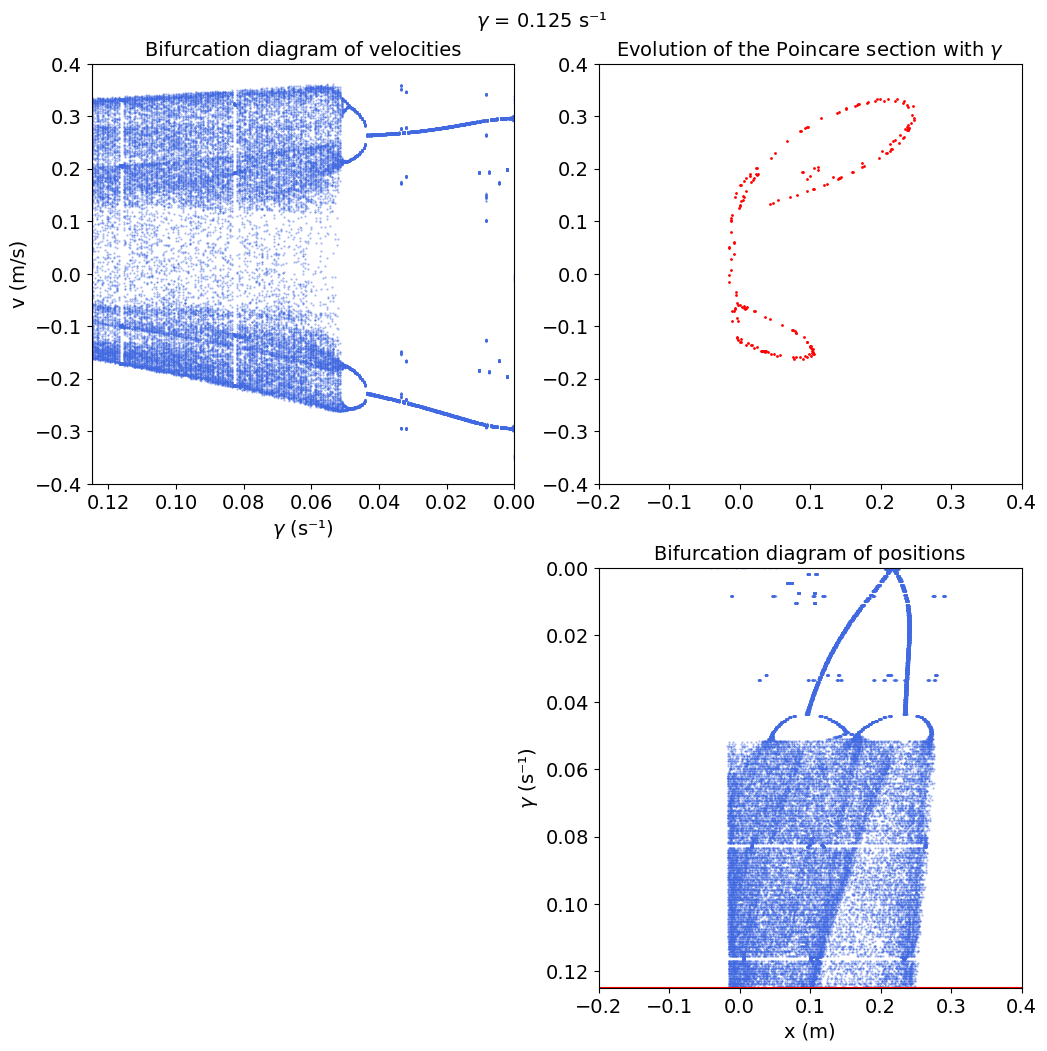

In [12]:
#fig4,(ax9,ax10,ax11) = plt.subplots(2,2, figsize=(16, 6), constrained_layout = True)
fig4 = plt.figure(figsize=(12,12), constrained_layout=True)

gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax9 = plt.subplot(gs[0, :2], )
ax10 = plt.subplot(gs[0, 2:])
ax11 = plt.subplot(gs[1, 2:])
ax10.plot(xp[0][-num:],vp[0][-num:],'.',color='red',markersize='1')
for i in range(amort.size):
    ax11.plot(np.array(xp[i],dtype=object)[-num:],amort[i]*np.ones(num),'.',color='royalblue',markersize='1',alpha=0.5)
    ax9.plot(amort[i]*np.ones(num),np.array(vp[i],dtype=object)[-num:],'.',color='royalblue',markersize='1',alpha=0.5)
ax11.plot([-0.2,0.4],[amort[0],amort[0]], color = 'red')
ax9.plot([amort[0],amort[0]],[-0.4,0.4], color = 'red')

animP = animation.FuncAnimation(fig4, update_fig, np.size(amort), fargs = (xp,vp, ), interval = 20)
animP.save('fig2.gif')
animP.save('fig2.mp4')

C:\Users\rodri\AppData\Local\Temp\ipykernel_13900\3243921136.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.fill_between(amort,abs(lyap-disp)/amort,abs(lyap+disp)/amort,alpha = 0.5,color ='royalblue')
C:\Users\rodri\AppData\Local\Temp\ipykernel_13900\3243921136.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(amort,abs(lyap/amort),'.', markersize = '2', color = 'royalblue')


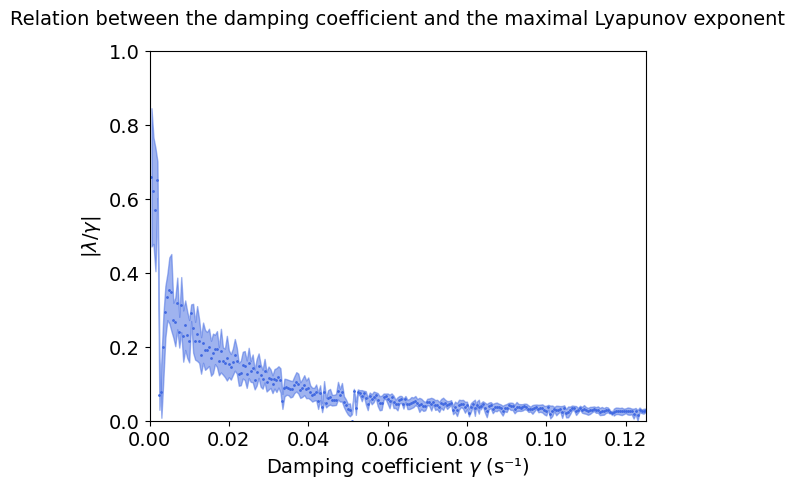

In [46]:
plt.fill_between(amort,abs(lyap-disp)/amort,abs(lyap+disp)/amort,alpha = 0.5,color ='royalblue')
plt.plot(amort,abs(lyap/amort),'.', markersize = '2', color = 'royalblue')
plt.ylabel('|$\lambda$/$\gamma$|',fontsize = 14)
plt.xlabel('Damping coefficient $\gamma$ (s⁻¹)',fontsize = 14)
plt.title('Relation between the damping coefficient and the maximal Lyapunov exponent',fontsize = 14, y = 1.05)
plt.xlim(min(amort),max(amort))
plt.ylim([0,1])
plt.savefig('ratio',bbox_inches='tight',dpi=250)